> # Fetal Health Classification Model

Pregnancy and fetus development is an extremely complex biological process that, while generally successful and without complications, can go wrong. Thus, ensuring that the fetus and mother are healthy is very important. **Using key measures and tests, our model 92% accurately predicts if the fetus and the mother are in danger of harm**. This model is extremely useful as it helps doctors diagnose fetal problems before hand and be prepared well in time for the kind of complications that may arise during pregnancy. 

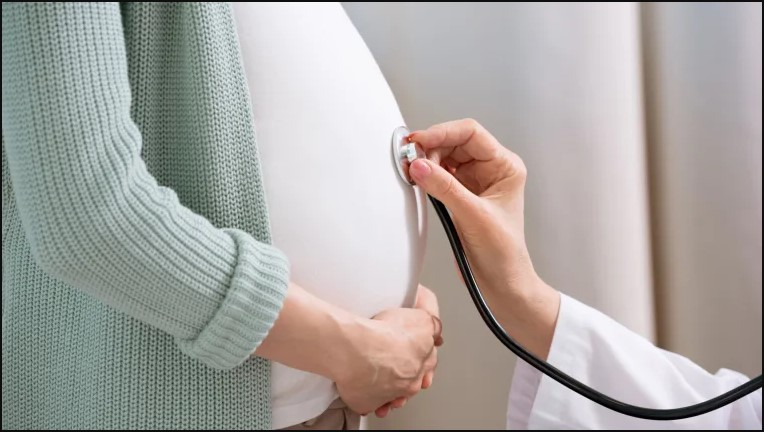





# Importing basic libs

1. Pandas - for data manipulation and analysis.
2. NumPy - for matrices and arrays, has a lot of math functions.
3. Matplotlib - for visualizations, like plots.
4. Pickle - this one is used or serializing and de-serializing a Python object structure. We will save trained model with pickle.


In [ ]:
import pandas as pd
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Models used and it's scikit learn modules 


We will be using the following algorithms in the classification model:

1. KNN
2. Decision Tree
3. Random Forest
4. Logistic Regression

We will compare the accuracy of all these algorithms and select the highest out of them.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Reading data


In [ ]:
data = pd.read_csv("./fetal_health.csv") 
print("Dataset Length = ", len(data))
print()
print("Glimpse of data ::")
print(data.head())


Dataset Length =  2126

Glimpse of data ::
   baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variab

# Analysing and Visualizing the data


Performing a general analysis on the dataset and visulaizing it.
This helps us in understanding the data and thus making a better and more accurate model. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

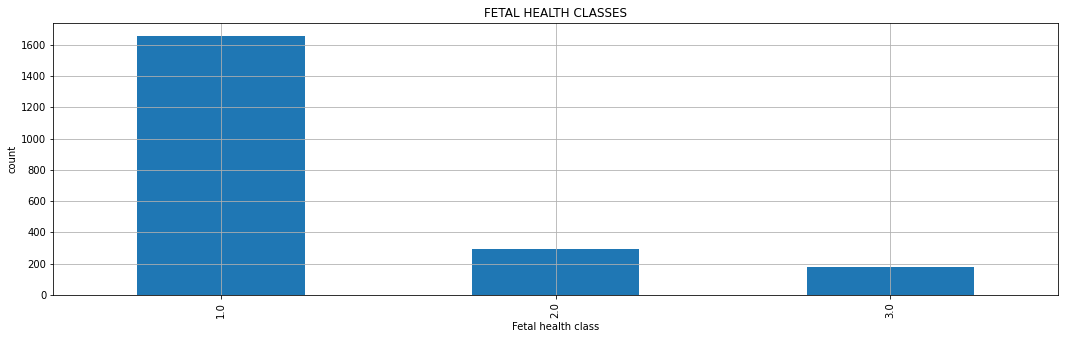

In [ ]:
data.info()
print("-----------x----------")
print("\n\n\nData Description:\n")
print(data.describe())
print("----------x----------\n\n")

#--------------

plt.figure(figsize=(18,5))
plt.title('FETAL HEALTH CLASSES')
plt.xlabel('Fetal health class')
plt.ylabel('count')

value_counts = data["fetal_health"].value_counts()
print(value_counts) 

value_counts.plot.bar()

plt.grid()
plt.show()



# Normalizing data


   baseline value  accelerations  fetal_movement  uterine_contractions  \
0        0.259259       0.000000             0.0              0.000000   
1        0.481481       0.315789             0.0              0.400000   
2        0.500000       0.157895             0.0              0.533333   
3        0.518519       0.157895             0.0              0.533333   
4        0.481481       0.368421             0.0              0.533333   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                  0.0                   0.0                       0.0   
1                  0.2                   0.0                       0.0   
2                  0.2                   0.0                       0.0   
3                  0.2                   0.0                       0.0   
4                  0.0                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                         0.813333

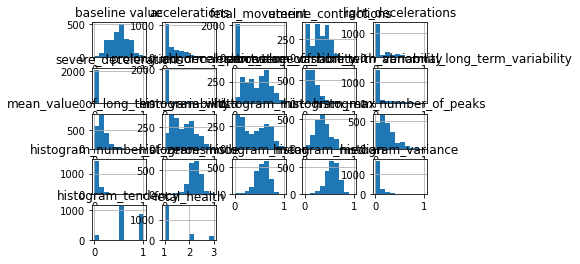

In [ ]:
cols = data.columns
scaler = MinMaxScaler(feature_range=(0, 1))
# scalar2 = StandardScaler()

temp = data["fetal_health"]

norm_data = scaler.fit_transform(data)
# norm_data = scalar2.fit_transform(norm_data)

data = pd.DataFrame(data=norm_data, columns=cols)

data["fetal_health"] = temp

print(data.head())

data.hist()
plt.show()


# Splitting data into test set and train set.

In [ ]:
rng = RandomState()

train = data.sample(frac=0.7, random_state=rng)
val = data.loc[~data.index.isin(train.index)]

train.reset_index(drop=True, inplace=True)
val.reset_index(drop=True, inplace=True)

print("* Train set:")
print(train.head())
print()
print("* Validation set:")
print(val.head())


* Train set:
   baseline value  accelerations  fetal_movement  uterine_contractions  \
0        0.500000       0.157895        0.000000              0.266667   
1        0.740741       0.157895        0.000000              0.266667   
2        0.444444       0.000000        0.004158              0.000000   
3        0.537037       0.421053        0.000000              0.533333   
4        0.370370       0.000000        0.000000              0.466667   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0             0.266667                   0.0                       0.0   
1             0.133333                   0.0                       0.0   
2             0.133333                   0.0                       0.0   
3             0.066667                   0.0                       0.0   
4             0.000000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                    

# Final prep of data

In [ ]:
x_columns = cols[:-1]
y_column = cols[-1]

x_raw_train = train[x_columns]
y_raw_train = train[y_column]

X_train = x_raw_train.copy()
Y_train = y_raw_train.copy()

print("X_TRAIN: ")
print(X_train.head())
print()
print("Y_TRAIN: ")
print(Y_train.head())
print()

x_raw_val = val[x_columns]
y_raw_val = val[y_column]

X_val = x_raw_val.copy()
Y_val = y_raw_val.copy()

print("X_VAL: ")
print(X_val.head())
print()
print("Y_VAL: ")
print(Y_val.head())

X_TRAIN: 
   baseline value  accelerations  fetal_movement  uterine_contractions  \
0        0.500000       0.157895        0.000000              0.266667   
1        0.740741       0.157895        0.000000              0.266667   
2        0.444444       0.000000        0.004158              0.000000   
3        0.537037       0.421053        0.000000              0.533333   
4        0.370370       0.000000        0.000000              0.466667   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0             0.266667                   0.0                       0.0   
1             0.133333                   0.0                       0.0   
2             0.133333                   0.0                       0.0   
3             0.066667                   0.0                       0.0   
4             0.000000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                       

# Train and validate data

In [ ]:
all_classifers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression()
]

all_acc = {}

for classifier in all_classifers:
    
    model = classifier
    model.fit(X_train, Y_train)
    
    model_pred = model.predict(X_val)
    model_acc = accuracy_score(Y_val, model_pred)
    
    classfier_name = classifier.__class__.__name__
    
    all_acc[classfier_name] = model_acc
    
    filename = classfier_name+'_model.pickle'
    pickle.dump(model, open(filename, 'wb'))  
    
    loaded_model = pickle.load(open(filename, 'rb'))
    result = loaded_model.score(X_val, Y_val)     
    
    print("-- {:<30} = {:<12} {:>25} = {:>12}".format(classfier_name, model_acc, 'loaded pickle model', result))

-- KNeighborsClassifier           = 0.9012539184952978       loaded pickle model = 0.9012539184952978
-- DecisionTreeClassifier         = 0.9216300940438872       loaded pickle model = 0.9216300940438872
-- RandomForestClassifier         = 0.932601880877743       loaded pickle model = 0.932601880877743
-- LogisticRegression             = 0.890282131661442       loaded pickle model = 0.890282131661442


# Visualizing performance results

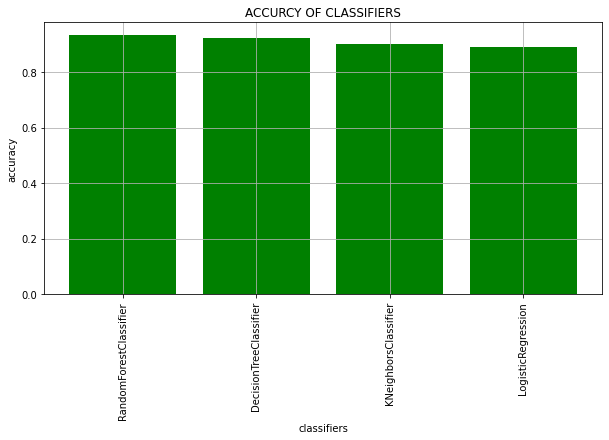

In [ ]:
#STEP-1
all_acc = dict(sorted(all_acc.items(), key=lambda item: item[1], reverse=True))

#STEP-2
keys = all_acc.keys()
values = all_acc.values()

#STEP-3
plt.figure(figsize=(10,5))
plt.title('ACCURCY OF CLASSIFIERS')
plt.xlabel('classifiers')
plt.ylabel('accuracy')
plt.bar(keys, values, color="g")

#STEP-4
plt.xticks(rotation=90)

#STEP-5
plt.grid()
plt.show()